##**Food Delivery Service in New Dehli Analysis**

## Executive Summary

This comprehensive analysis aimed to identify key correlations between various features to enhance the business model of our food sharing platform. Despite the constraints of a limited dataset, which presented challenges in drawing definitive conclusions, several significant insights emerged. The analysis encompassed data preparation, exploratory data analysis (EDA), hypothesis testing, and the formulation of strategic recommendations.

## Dataset Limitations and Considerations

It is imperative to acknowledge several limitations within the dataset that warrant consideration:

1. Sample Size: The dataset's limited size of 1,000 records constrains the ability to draw broadly applicable conclusions.
Additionaly, the dataset only covers one month of operation and thus offers a limited perspective on the app performance.

2. Contextual Information: Critical contextual details are absent, including:
   - The relationship between delivery fees and order values (additive or inclusive).
   - The nature of processing fees and their application.
   - The source of discounts (restaurant-offered or platform-provided).

3. Assumptions: For the purposes of this analysis, certain assumptions were made. In a real-world scenario, comprehensive contextual information would be essential for accurate interpretation and decision-making.

## Methodology

### Data Preparation
To facilitate a more nuanced analysis, we augmented the dataset with additional columns, including:
- Discount conversion metrics
- Revenue calculations
- Delivery time analytics
- Temporal segmentation (hour and time period)

### Exploratory Data Analysis (EDA)
Our EDA revealed several noteworthy patterns:
- Inconsistent order and revenue fluctuations across the dataset
- Anomalous revenue-order relationships on specific days, potentially indicative of data randomness
- Chargebacks and refunds impacting approximately one-third of transactions, albeit representing only 10% of the total value of affected orders

## Key Findings

1. Customer Acquisition and Retention: The platform exhibits a suboptimal customer-to-restaurant ratio of 1.6, signaling potential issues in customer acquisition or retention strategies.

2. Order Frequency: Even top-performing restaurants demonstrate low order volumes, with a maximum of 6 orders, indicating significant room for improvement in customer engagement.

3. Delivery Efficiency: Average delivery times approaching 2 hours may be a critical factor deterring repeat orders and overall customer satisfaction.

4. Discount Efficacy: While the '15% New User' discount showed statistical significance in impacting revenue, further analysis revealed that it underperforms compared to other discount offers and non-discounted orders in terms of average order value.

## Statistical Analysis

We conducted ANOVA tests to determine significant differences in how various features affect total order value and commission received. The results indicated that the 'Discounts and Offers' feature, specifically the '15% New User' discount, has a statistically significant impact on revenue. However, this statistical significance does not translate into tangible revenue growth for participating restaurants.

## Recommendations

1. Refund Process Optimization: Conduct a thorough review of the chargeback and refund processes to mitigate their impact on overall revenue.

2. Delivery Time Improvement: Implement strategies to reduce delivery times, thereby enhancing customer satisfaction and encouraging repeat orders.

3. Customer Base Expansion: Develop and execute targeted strategies to increase both the customer base and order frequency.

4. Data Collection Enhancement: Prioritize the collection of more comprehensive and representative data to enable more robust analysis and insights.

5. Advanced Statistical Analysis: Consider conducting further statistical analyses with an expanded dataset to identify significant factors affecting platform performance.

## Conclusion

While this analysis provides valuable insights into our food sharing platform's current performance, the limited dataset constrains our ability to draw definitive conclusions. Moving forward, it is imperative to address the identified concerns, particularly regarding customer acquisition, order frequency, and delivery efficiency. Additionally, a more comprehensive data collection strategy will be crucial for conducting more in-depth analyses and deriving actionable insights to drive the platform's growth and success.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [ ]:
df = pd.read_csv('food_orders_new_delhi.csv')

# Check for Data Integrity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
# No null value except for 'discount', which is normal as some order may not benefit of discount

df.isnull().sum()

,0
Order ID,0
Customer ID,0
Restaurant ID,0
Order Date and Time,0
Delivery Date and Time,0
Order Value,0
Delivery Fee,0
Payment Method,0
Discounts and Offers,185
Commission Fee,0


In [ ]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [ ]:
df['Discounts and Offers'].value_counts()

,count
Discounts and Offers,
10%,233
50 off Promo,201
15% New User,198
5% on App,183


The dataset is clean overall.

# Feature engineering
Adding features:
- Discounts Perc - Converts 'Discounts and Offers' into percentage values
- Discounts Substract - Converts 'Discounts and Offers' into fixed numeric values
- Revenue - Calculate Revenue for restaurants
- Delivery Time - Calculate delivery time per order
- Time Bins - Segment delivery times in time bins

In [ ]:
# Adding discount percentage for further calculation
df.loc[df['Discounts and Offers']=='10%', 'Discounts Perc'] = 10
df.loc[df['Discounts and Offers']=='50 off Promo', 'Discounts Perc'] = 0
df.loc[df['Discounts and Offers']=='15% New User', 'Discounts Perc'] = 15
df.loc[df['Discounts and Offers']=='5% on App', 'Discounts Perc'] = 5
df.loc[df['Discounts and Offers'].isnull(), 'Discounts Perc'] = 0
df.loc[df['Discounts and Offers']=='50 off Promo', 'Discounts Substract'] = 50
df.loc[df['Discounts Substract'].isnull(), 'Discounts Substract'] = 0

# Adding a 'No Discount' category for 'Discounts and Offers'
df.loc[df['Discounts and Offers'].isnull(), 'Discounts and Offers'] = 'No Discount'

# Calculating revenue
df['Revenue'] = (df['Order Value'] + df['Delivery Fee'] - df['Commission Fee'] + df['Payment Processing Fee'] - df['Refunds/Chargebacks']) * (1 - (df['Discounts Perc'] / 100)) - df['Discounts Substract']


# Converting time-linked columns to datetime type
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])


# Creating 'Delivery Time' column in minutes
df['Delivery Time'] = (df['Delivery Date and Time'] - df['Order Date and Time']).dt.total_seconds() / 60


# Creating Time Bins:
# 30 < x < 50
# 50 < x < 70
# 70 < x < 90
# 90 < x < 110
# x > 110
df.loc[(df['Delivery Time'] <= 50), 'Time Bins'] = '30 < x <= 50'
df.loc[(df['Delivery Time'] > 50) & (df['Delivery Time'] <= 70), 'Time Bins'] = '50 < x <= 70'
df.loc[(df['Delivery Time'] > 70) & (df['Delivery Time'] <= 90), 'Time Bins'] = '70 < x <= 90'
df.loc[(df['Delivery Time'] > 90) & (df['Delivery Time'] <= 110), 'Time Bins'] = '90 < x <= 110'
df.loc[(df['Delivery Time'] > 110), 'Time Bins'] = 'x > 110'

# EDA

In [ ]:
# Count of order by day
order_per_day = df.groupby(df['Order Date and Time'].dt.date).size().reset_index().rename(columns={0:'count'})

# revenue per day
revenue_per_day = df.groupby(df['Order Date and Time'].dt.date)['Revenue'].mean().reset_index()

# We observe no consistency throughout the month the data set covers.
# Number of orders and revenue per day fluctuate in unexpected and erratic manner.

<Axes: xlabel='Order Date and Time', ylabel='count'>

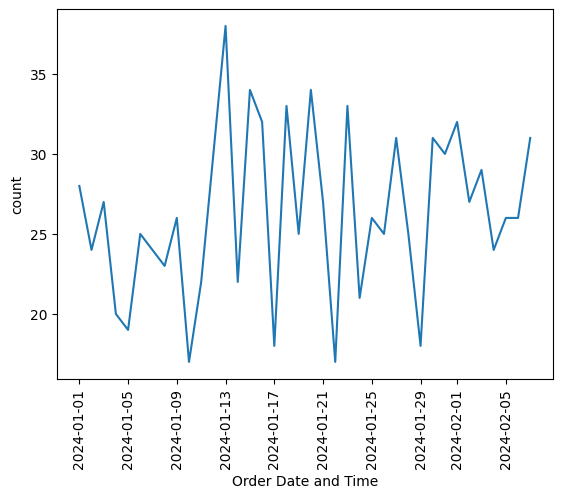

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(data=order_per_day, x='Order Date and Time', y='count')

<Axes: xlabel='Order Date and Time', ylabel='Revenue'>

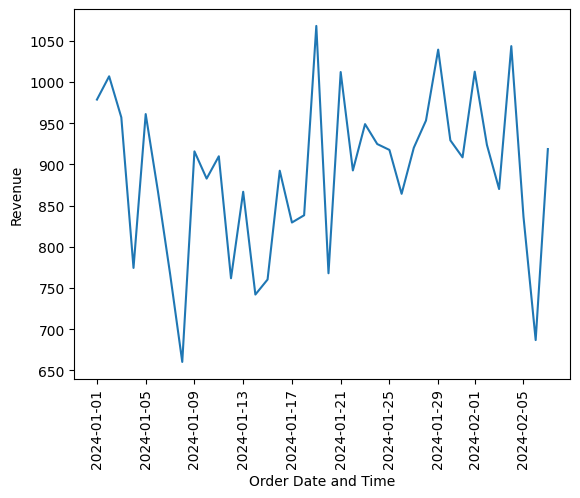

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(data=revenue_per_day, x='Order Date and Time', y='Revenue')

In [ ]:
# Revenue per day of the week
revenue_per_weekday = df.groupby(df['Order Date and Time'].dt.weekday)['Revenue'].mean().reset_index()

#Number of orders per day of the week
order_per_weekday = df.groupby(df['Order Date and Time'].dt.weekday).size().reset_index().rename(columns={0:'count'})

# While we cannot observe a strict negative correlation between the revenue and the number of orders per day,
# we notice peculiar occurences that see on days 2, 3, 4 and 6, a high revenue corresponding to a low number of orders.
# We can't exactly explain this pattern, but it has us suspecting the data set could have been generated randomly.

<Axes: xlabel='Order Date and Time', ylabel='Revenue'>

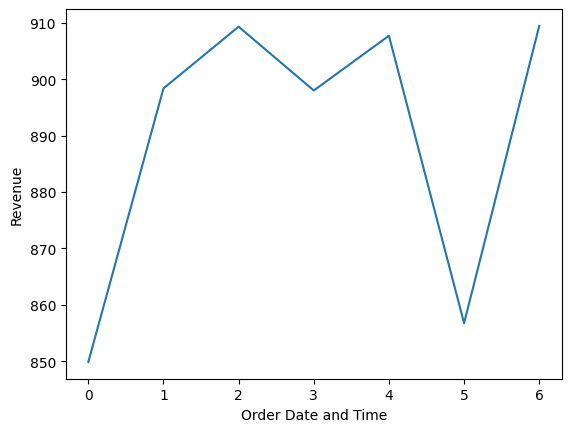

In [ ]:
sns.lineplot(data=revenue_per_weekday, x='Order Date and Time', y='Revenue')

<Axes: xlabel='Order Date and Time', ylabel='count'>

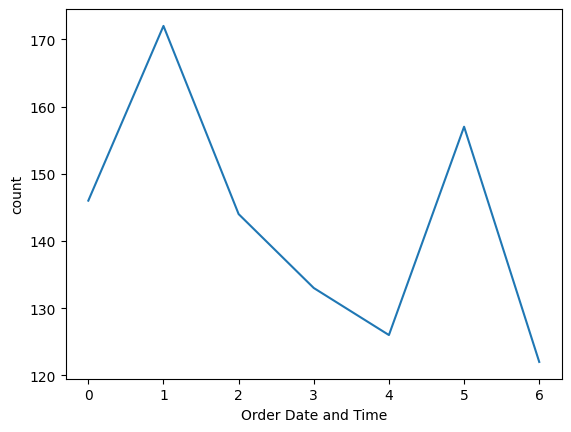

In [ ]:
sns.lineplot(data=order_per_weekday, x='Order Date and Time', y='count')

In [ ]:
# Number of order per hour
order_per_hour = df.groupby(df['Order Date and Time'].dt.hour).size().reset_index().rename(columns={0:'count'})

# revenue per hour
revenue_per_hour = df.groupby(df['Order Date and Time'].dt.hour)['Revenue'].mean().reset_index()

# Similar observation as for the count of order and revenue per day.
# Despite descent number of orders around 4:00, 16:00 and 24:00, we record dramatic drop in revenue.

<Axes: xlabel='Order Date and Time', ylabel='count'>

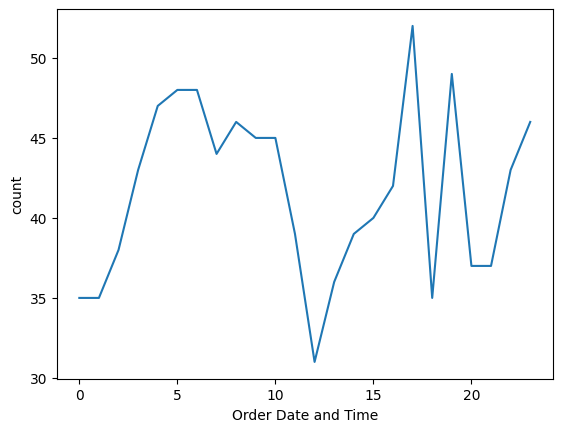

In [ ]:
sns.lineplot(data=order_per_hour, x='Order Date and Time', y='count')

In [ ]:
# Distribution seem a bit all over the place, with an interesting aspect that time around 12:00 record the fewer orders

<Axes: xlabel='Order Date and Time', ylabel='Revenue'>

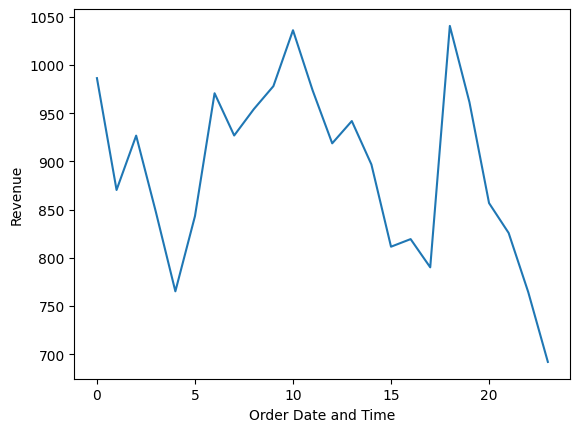

In [ ]:
sns.lineplot(data=revenue_per_hour, x='Order Date and Time', y='Revenue')

In [ ]:
# Revenue loss for restaurants
print('Revenue total: ')
print(df['Commission Fee'].sum())
print('Revenue loss: ')
print(df.loc[df['Commission Fee'] < 0, 'Commission Fee'].sum())

# Losses seem to be marginal - could investigate the user who provoke these loss, see if they abuse of a system?

Revenue total: 
126990
Revenue loss: 
0


In [ ]:
print('Order Revenue:')
print(df['Order Value'].sum())
print('Percentage of order with refunds:')
print((df['Refunds/Chargebacks']!= 0).sum() / 1000 * 100)
print('Percentage of refunds affected orders:')
print(df.loc[df['Refunds/Chargebacks']!= 0, 'Order Value'].sum() / df.loc[df['Refunds/Chargebacks']!= 0, 'Refunds/Chargebacks'].sum())

# Approximately 1/3 of orders benefit of refunds/chargebacks.
# Although, this only account for approx. 10 % of the total order revenue.
# Here again, a strange pattern/politic, as one would expect of a refund to cover the full price of an order.

Order Revenue:
1053969
Percentage of order with refunds:
28.499999999999996
Percentage of refunds affected orders:
10.342332155477031


In [ ]:
# ARPU

(df.groupby('Customer ID')['Revenue'].mean()).mean()

883.5443329813446

In [ ]:
# Retention

(df['Customer ID'].value_counts()).mean()

# Fairly bad retention as it seem customer do not order, in average, more than once

1.0559662090813093

In [ ]:
# Odd number of restaurant / customer
# Most popular restaurant = 6 orders
# Address fullfilment time
# Address discount use
# Address strange distribution of order per day
# Distribution seem a bit all over the place, with an interesting aspect that time around 12:00 record the fewer orders

(df['Restaurant ID'].value_counts()).mean()

1.6103059581320451

In [ ]:
print('Ratio of #Customer / #Restaurant:')
print(df['Customer ID'].nunique() / df['Restaurant ID'].nunique())
print('Restaurant with top orders:')
print(df.groupby('Restaurant ID')['Order ID'].count().sort_values(ascending=False).max())


# Strange Ratio of #Customer / #Restaurant
# Restaurant with top #order, only count 6 orders, which is low and concerning

Ratio of #Customer / #Restaurant:
1.5249597423510468
Restaurant with top orders:
6


       Time Bins   Revenue
0   30 < x <= 50  232709.7
1   50 < x <= 70  182616.7
2   70 < x <= 90  202077.0
3  90 < x <= 110  198335.5
4        x > 110   73058.9
       Time Bins  Commission Fee
0   30 < x <= 50           32168
1   50 < x <= 70           26240
2   70 < x <= 90           28870
3  90 < x <= 110           28186
4        x > 110           11526


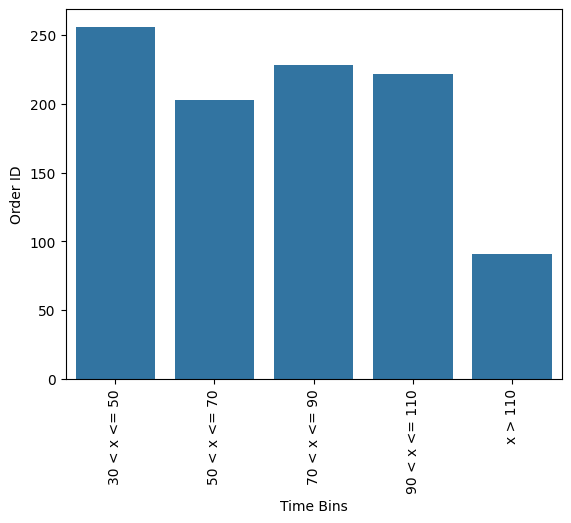

In [ ]:
# Observation on delivery time

Time_bins = df.groupby('Time Bins')['Order ID'].count().reset_index()

plt.xticks(rotation=90)
sns.barplot(data=Time_bins, x='Time Bins' , y='Order ID')

print(df.groupby('Time Bins')['Revenue'].sum().reset_index())
print(df.groupby('Time Bins')['Commission Fee'].sum().reset_index())

# Overall delivery time seems to excessive and should be addressed in order to ensure smooth operation.
# This could be an element that affects our customers not ordering more than once at a restaurant.

In [ ]:
# Distribution of payment method and revenue per payment method seem to be quite even

payment_distrib = df.groupby('Payment Method').agg({'Revenue' : ['mean', 'count']}).reset_index()
payment_distrib['ratio'] = payment_distrib[('Revenue', 'mean')] / payment_distrib[('Revenue', 'count')]
payment_distrib

# Not much conclusion to draw from these observation, as distribution looks similar

Payment Method     Revenue           ratio
                           mean count          
0  Cash on Delivery  883.000700   357  2.473391
1       Credit Card  904.240653   337  2.683207
2    Digital Wallet  878.553758   306  2.871091

In [ ]:
# Distribution of Discounts and Offers

discount_distrib = df.groupby('Discounts and Offers', dropna=False).agg({'Revenue' : ['mean', 'count']}).reset_index()
discount_distrib['ratio'] = discount_distrib[('Revenue', 'mean')] / discount_distrib[('Revenue', 'count')]
discount_distrib

# The 5% on app is our best ratio for bringing revenue
# The 50 off promo is our least interesting in term of revenue - perhaps to consider this one only to attract user at certain time of the day?
# This might explain the drop in revenue around midnight but not more than that...

Discounts and Offers     Revenue           ratio
                              mean count          
0                  10%  864.328326   233  3.709564
1         15% New User  772.641414   198  3.902229
2            5% on App  925.050820   183  5.054923
3         50 off Promo  944.074627   201  4.696889
4          No Discount  948.016216   185  5.124412

<Axes: xlabel='Order Date and Time', ylabel='count'>

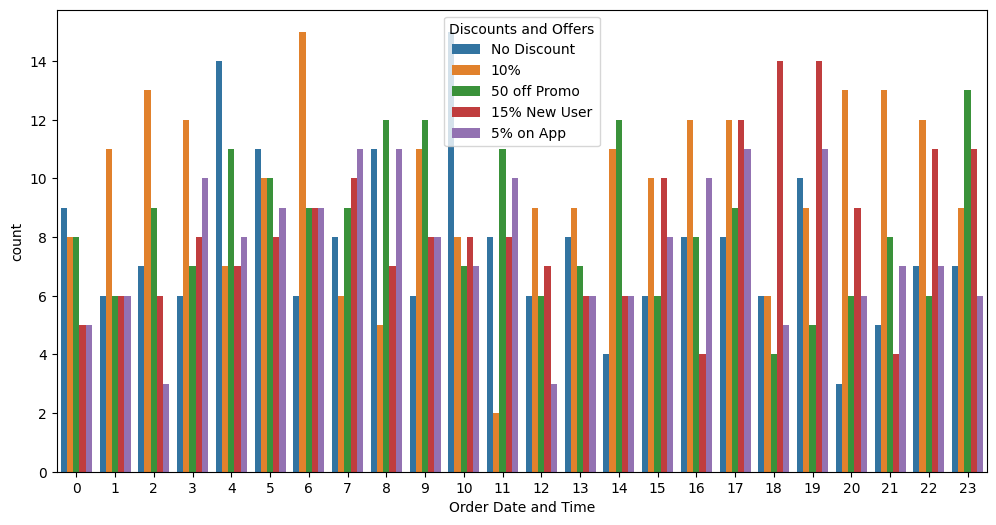

In [ ]:
# use of discount by time of the day

df['Hour'] = df['Order Date and Time'].dt.hour
discount_hour = df.groupby(df['Order Date and Time'].dt.hour)['Discounts and Offers'].value_counts().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_hour, x='Order Date and Time', y='count', hue='Discounts and Offers')

<Axes: >

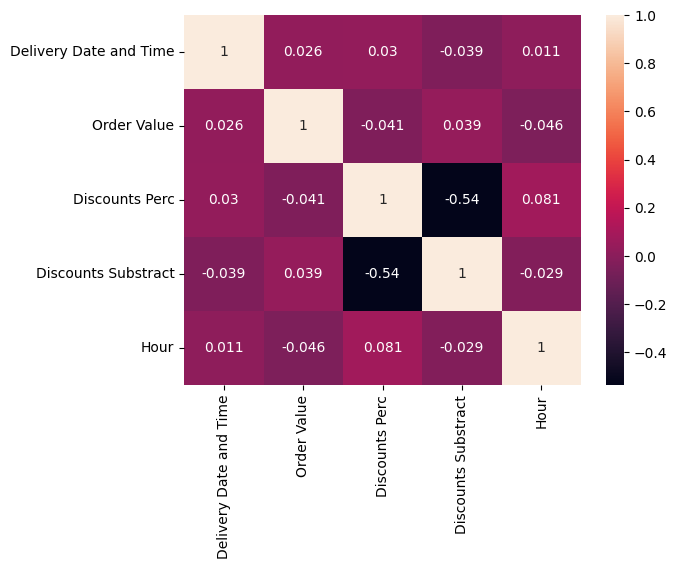

In [ ]:
correlation = df[['Delivery Date and Time', 'Order Value', 'Discounts Perc', 'Discounts Substract', 'Hour']].corr()
sns.heatmap(correlation, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto')

# From the barplot and the heatmap, we do not observe correlation or pattern between type of discounts and the time of the day

# Hypothesis test on Pricing

In [ ]:
# Checking if delivery fees have an incidence on restaurants' revenues
# h0: There is no difference between the number of orders per delivery fee
# h1: There at least one difference between the number of orders per delivery fee

# Independent variable is 'Delivery Fee'
# Dependent variable is the 'Number of Order'

group_0 = df.loc[df['Delivery Fee']==0, 'Revenue'].to_list()
group_20 = df.loc[df['Delivery Fee']==20, 'Revenue'].to_list()
group_30 = df.loc[df['Delivery Fee']==30, 'Revenue'].to_list()
group_40 = df.loc[df['Delivery Fee']==40, 'Revenue'].to_list()
group_50 = df.loc[df['Delivery Fee']==50, 'Revenue'].to_list()

In [ ]:
# Results: We fail to reject our h0 hypothesis

f_stat, p_value = stats.f_oneway(group_0, group_20, group_30, group_40, group_50)
print(f_stat)
print(p_value)

2.261613676969076
0.06073516322010978


In [ ]:
# Checking if delivery fees have an incidence on the app revenue
# h0: There is no difference between the app revenue per delivery fee
# h1: There at least one difference between the app revenue per delivery fee

# Independent variable is 'Delivery Fee'
# Dependent variable is the 'Comission Fee'

group_cf0 = df.loc[df['Delivery Fee']==0, 'Commission Fee'].to_list()
group_cf20 = df.loc[df['Delivery Fee']==20, 'Commission Fee'].to_list()
group_cf30 = df.loc[df['Delivery Fee']==30, 'Commission Fee'].to_list()
group_cf40 = df.loc[df['Delivery Fee']==40, 'Commission Fee'].to_list()
group_cf50 = df.loc[df['Delivery Fee']==50, 'Commission Fee'].to_list()

In [ ]:
# Results: We fail to reject our h0 hypothesis

f_stat_cf, p_value_cf = stats.f_oneway(group_cf0, group_cf20, group_cf30, group_cf40, group_cf50)
print(f_stat_cf)
print(p_value_cf)

1.0993494534438657
0.3555321752309888


In [ ]:
# Checking if delivery time has an influence on restaurants' revenues
# h0: There is no difference between the restaurants revenue per time bin
# h1: There at least one difference between the restaurants revenue per time bin

# Independent variable is 'Time Bins'
# Dependent variable is the 'Revenue'

group_tb50 = df.loc[df['Time Bins']=='30 < x <= 50', 'Revenue'].to_list()
group_tb70 = df.loc[df['Time Bins']=='50 < x <= 70', 'Revenue'].to_list()
group_tb90 = df.loc[df['Time Bins']=='70 < x <= 90', 'Revenue'].to_list()
group_tb110 = df.loc[df['Time Bins']=='90 < x <= 110', 'Revenue'].to_list()
group_tb120 = df.loc[df['Time Bins']=='x > 110', 'Revenue'].to_list()

In [ ]:
# Results: We fail to reject our h0 hypothesis

f_stat_tb, p_value_tb = stats.f_oneway(group_tb50, group_tb70, group_tb90, group_tb110, group_tb120)
print(f_stat_tb)
print(p_value_tb)

0.7746866124524632
0.5417196351270166


In [ ]:
# Checking if delivery time has an influence on the app revenue
# h0: There is no difference between the app revenue per time bin
# h1: There at least one difference between the app revenue per time bin

# Independent variable is 'Time Bins'
# Dependent variable is the 'Comission Fee'

group_tb_cf50 = df.loc[df['Time Bins']=='30 < x <= 50', 'Commission Fee'].to_list()
group_tb_cf70 = df.loc[df['Time Bins']=='50 < x <= 70', 'Commission Fee'].to_list()
group_tb_cf90 = df.loc[df['Time Bins']=='70 < x <= 90', 'Commission Fee'].to_list()
group_tb_cf110 = df.loc[df['Time Bins']=='90 < x <= 110', 'Commission Fee'].to_list()
group_tb_cf120 = df.loc[df['Time Bins']=='x > 110', 'Commission Fee'].to_list()

In [ ]:
# Results: We fail to reject our h0 hypothesis

f_stat_tb_cf, p_value_tb_cf = stats.f_oneway(group_tb_cf50, group_tb_cf70, group_tb_cf90, group_tb_cf110, group_tb_cf120)
print(f_stat_tb_cf)
print(p_value_tb_cf)

0.20738294214938047
0.9343788873553196


In [ ]:
# Checking if discounts and offers have an influence on the app revenue
# h0: There is no difference between the app revenue per discount
# h1: There at least one difference between the app revenue per discount

# Independent variable is 'Discounts and Offers'
# Dependent variable is the 'Comission Fee'

group_dis_cf5 = df.loc[df['Discounts and Offers']=='5% on App', 'Commission Fee'].to_list()
group_dis_cf10 = df.loc[df['Discounts and Offers']=='10%', 'Commission Fee'].to_list()
group_dis_cf15 = df.loc[df['Discounts and Offers']=='15% New User', 'Commission Fee'].to_list()
group_dis_cf50 = df.loc[df['Discounts and Offers']=='50 off Promo', 'Commission Fee'].to_list()
group_dis_cf0 = df.loc[df['Discounts and Offers'] == 'No Discount' , 'Commission Fee'].to_list()


In [ ]:
# Results: We fail to reject our h0 hypothesis

f_stat_dis_cf, p_value_dis_cf = stats.f_oneway(group_dis_cf5, group_dis_cf10, group_dis_cf15, group_dis_cf50, group_dis_cf0)
print(f_stat_dis_cf)
print(p_value_dis_cf)

0.46144227910131547
0.7640727604664048


In [ ]:
# Checking if discounts and offers have an influence on restaurants' revenues
# h0: There is no difference between the restaurants revenue per discount
# h1: There at least one difference between the restaurants revenue per discount

# Independent variable is 'Discounts and Offers'
# Dependent variable is the 'Comission Fee'

group_dis_r5 = df.loc[df['Discounts and Offers']=='5% on App', 'Revenue'].to_list()
group_dis_r10 = df.loc[df['Discounts and Offers']=='10%', 'Revenue'].to_list()
group_dis_r15 = df.loc[df['Discounts and Offers']=='15% New User', 'Revenue'].to_list()
group_dis_r50 = df.loc[df['Discounts and Offers']=='50 off Promo', 'Revenue'].to_list()
group_dis_r0 = df.loc[df['Discounts and Offers']=='No Discount' , 'Revenue'].to_list()

In [ ]:
# Results: We can retain our h1 hypothesis

f_stat_dis_r, p_value_dis_r = stats.f_oneway(group_dis_r5, group_dis_r10, group_dis_r15, group_dis_r50, group_dis_r0)
print(f_stat_dis_r)
print(p_value_dis_r)

4.199670583103574
0.0022349559319257946


In [ ]:
# Determining which group(s) differ from the other

all_data = group_dis_r5 + group_dis_r10 + group_dis_r15 + group_dis_r50 + group_dis_r0

# Create labels for each group
labels = (['5% on App'] * len(group_dis_r5) +
          ['10%'] * len(group_dis_r10) +
          ['15% New User'] * len(group_dis_r15) +
          ['50 off Promo'] * len(group_dis_r50) +
          ['No Discount'] * len(group_dis_r0))

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, labels)

# Print the results
print(tukey_results)


# We find that our '15% New User' discount has an influence on restaurants' revenues

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2    meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------
         10% 15% New User -91.6869 0.3333 -225.5489  42.1751  False
         10%    5% on App  60.7225 0.7438  -76.0732 197.5182  False
         10% 50 off Promo  79.7463 0.4755  -53.5746 213.0672  False
         10%  No Discount  83.6879 0.4488   -52.693 220.0688  False
15% New User    5% on App 152.4094 0.0283   10.3946 294.4242   True
15% New User 50 off Promo 171.4332 0.0068   32.7624  310.104   True
15% New User  No Discount 175.3748 0.0066   33.7595 316.9901   True
   5% on App 50 off Promo  19.0238 0.9961  -122.481 160.5287  False
   5% on App  No Discount  22.9654 0.9926 -121.4262  167.357  False
50 off Promo  No Discount   3.9416    1.0 -137.1623 145.0455  False
-------------------------------------------------------------------


In [ ]:
h1_arpu = df.groupby('Discounts and Offers').agg({'Revenue' : 'sum', 'Order ID' : 'count'}).reset_index()
h1_arpu['ratio_arpu'] = h1_arpu['Revenue'] / h1_arpu['Order ID']
h1_arpu

# Through our ratio we see that the '15% New User' discount has a negative influence on restaurants' revenues
# Thus one should consider to rework this offer or to replace it

,Discounts and Offers,Revenue,Order ID,ratio_arpu
0,10%,201388.5,233,864.328326
1,15% New User,152983.0,198,772.641414
2,5% on App,169284.3,183,925.050820
3,50 off Promo,189759.0,201,944.074627
4,No Discount,175383.0,185,948.016216


In [1]:
# After observing the result of our hypothesis test on the influence of discounts on restaurants' revenues,
# we decided to calculate the expected revenue for each of the available discounts.
# To do so, from the previously 'no discount' ratio_arpu we calculated, we calculated the expected ratio_arpu after the discounts.
# We then compared the expected ratio_arpu to the real ratio_arpu:


print(f'Expected revenue for 10%: {948 * (1 - 0.10)}')
print(f'Expected revenue for 15%: {948 * (1 - 0.15)}')
print(f'Expected revenue for 5%: {948 * (1 - 0.05)}')

# We observe that all discounts perform below the expected threshold.

Expected revenue for 10%: 853.2
Expected revenue for 15%: 805.8
Expected revenue for 5%: 900.5999999999999


In [ ]:
# Despite poor capital performance of the discounts, we check if they
# perform well in term of customer retention.

h1_cust = df.loc[df['Discounts and Offers']=='15% New User']
print('15% mean order:')
print(h1_cust.groupby('Customer ID')['Order ID'].count().mean())

h2_cust = df.loc[df['Discounts and Offers']=='5% on App']
print('5% mean order:')
print(h2_cust.groupby('Customer ID')['Order ID'].count().mean())

h3_cust = df.loc[df['Discounts and Offers']=='10%']
print('10% mean order:')
print(h3_cust.groupby('Customer ID')['Order ID'].count().mean())

h4_cust = df.loc[df['Discounts and Offers']=='50 off Promo']
print('50 off Promo mean order:')
print(h4_cust.groupby('Customer ID')['Order ID'].count().mean())

h5_cust = df.loc[df['Discounts and Offers']=='No Discount']
print('No Discount mean order:')
print(h5_cust.groupby('Customer ID')['Order ID'].count().mean())
# It shows that they don't.

# Ultimately all our offers do not help with customer retention - no discount is top2 in this category by only a narrow margin with 10%'s top1.
# Thus this strategy should be questionned.
# More urgently the 15% should be addressed, as it provokes our biggest loss on top on performing poorly with retention.
# However, these observations could be mitigated, given the dataset only cover one month of activity.


15% mean order:
1.0153846153846153
5% mean order:
1.011049723756906
10% mean order:
1.017467248908297
50 off Promo mean order:
1.0100502512562815
No Discount mean order:
1.0164835164835164


In [ ]:
# h0: There is no difference between the order value per discount
# h1: There at least one difference between the order value per discount

# Independent variable is 'Discounts and Offers'
# Dependent variable is the 'Comission Fee'

group_dis_ov5 = df.loc[df['Discounts and Offers']=='5% on App', 'Order Value'].to_list()
group_dis_ov10 = df.loc[df['Discounts and Offers']=='10%', 'Order Value'].to_list()
group_dis_ov15 = df.loc[df['Discounts and Offers']=='15% New User', 'Order Value'].to_list()
group_dis_ov50 = df.loc[df['Discounts and Offers']=='50 off Promo', 'Order Value'].to_list()
group_dis_ov0 = df.loc[df['Discounts and Offers']=='No Discount' , 'Order Value'].to_list()

In [ ]:
# Results show that we cannot reject our h0 hypothesis

f_stat_dis_ov, p_value_dis_ov = stats.f_oneway(group_dis_ov5, group_dis_ov10, group_dis_ov15, group_dis_ov50, group_dis_ov0)
print(f_stat_dis_ov)
print(p_value_dis_ov)

0.6917969618302091
0.5976946468495901
